In [ ]:
# !apt-get update && apt-get install -y graphviz 

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [950 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2693 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [ ]:
import time

start = time.time()

In [13]:
import os
import logging
from pytz import timezone
from datetime import datetime

from helpers.log_helper import LogHelper
from helpers.dir_utils import create_dir
from helpers.analyze_utils import count_accuracy, plot_estimated_graph

In [14]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(1)


exp_name = 'n_500_d_5_e_3_ER'

# exp_name = 'n_500_d_20_e_12_ER'
# exp_name = 'n_500_d_20_e_12_SF'
# exp_name = 'n_500_d_100_e_60_ER'
# exp_name = 'n_500_d_100_e_60_SF'
# exp_name = 'n_500_d_300_e_180_ER'
# exp_name = 'n_500_d_300_e_180_SF'

# exp_name = 'n_2000_d_20_e_12_ER'
# exp_name = 'n_2000_d_20_e_12_SF'
# exp_name = 'n_2000_d_100_e_60_ER'
# exp_name = 'n_2000_d_100_e_60_SF'
# exp_name = 'n_2000_d_300_e_180_ER'
# exp_name = 'n_2000_d_300_e_180_SF'


dataset_path = '../../experiment/datasets/{}/X.csv'.format(exp_name)
true_path = '../../experiment/datasets/{}/W_true.csv'.format(exp_name)

df = pd.read_csv(dataset_path, header=None)
X = pd.DataFrame(df)

model = lingam.DirectLiNGAM()
model.fit(X)

W_est = model.adjacency_matrix_

W_true = pd.read_csv(true_path, header=None)

['1.19.5', '1.1.5', '0.19.1', '1.5.5']


In [3]:
# Setup for logging
output_dir = 'output/{}/{}'.format(exp_name, datetime.now(timezone('Asia/Taipei')).strftime('%Y-%m-%d_%H-%M-%S-%f')[:-3])
create_dir(output_dir)
LogHelper.setup(log_path='{}/training.log'.format(output_dir), level_str='INFO')
_logger = logging.getLogger(__name__)

2022-04-03 14:15:22,257 INFO - helpers.log_helper - Finished configuring logger.


In [11]:
!pip install graphviz

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [15]:
# Save w_est png
dot = make_dot(W_est)

dot.format = 'png'

w_est_dag = dot.render('{}/w_est_dag'.format(output_dir))

# Save w_true png
dot = make_dot(W_true)

dot.format = 'png'

w_true_dag = dot.render('{}/w_true_dag'.format(output_dir))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [5]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.461,  0.316,  0.   ],
       [-0.585,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.193,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [6]:
X

,0,1,2,3,4
0,0.668842,-0.089011,-0.397309,0.456287,0.685929
1,-1.979398,0.884134,1.635287,0.902906,1.385626
2,0.505878,-0.784193,-0.196721,-1.879362,1.585061
3,-0.873609,-0.374613,-0.444648,1.030363,-0.646985
4,-1.128895,-0.010752,0.298819,-0.741400,0.714133
...,...,...,...,...,...
495,0.234312,0.117605,-0.479872,-0.348071,1.365020
496,-1.386556,1.487630,1.617227,1.540519,0.545693
497,0.852294,-0.374762,0.705280,-0.315071,0.839721
498,-0.801264,0.648562,0.098655,0.595937,0.626558


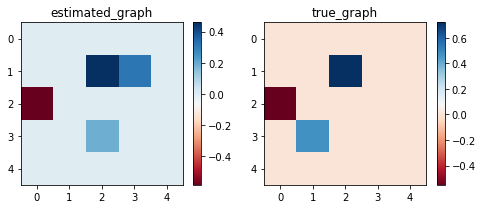

2022-04-03 14:17:29,750 INFO - __main__ - Thresholding.


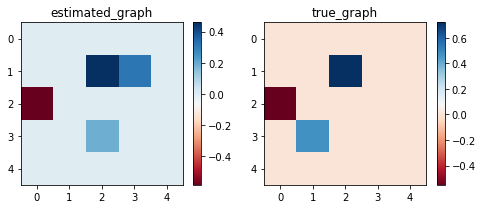

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
2022-04-03 14:17:30,072 INFO - __main__ - Results after thresholding by 0: {'fdr': 0.5, 'tpr': 0.6666666666666666, 'fpr': 0.2857142857142857, 'shd': 2, 'pred_size': 4}


In [7]:
# Plot raw estimated graph
plot_estimated_graph(W_est, W_true,
                     save_name='{}/raw_estimated_graph.png'.format(output_dir))

_logger.info('Thresholding.')
# Plot thresholded estimated graph
graph_thres = 0
copy_W_est = W_est
copy_W_est[np.abs(W_est) < graph_thres] = 0   # Thresholding
plot_estimated_graph(copy_W_est, W_true,
                     save_name='{}/thresholded_estimated_graph.png'.format(output_dir))
results_thresholded = count_accuracy(W_true, W_est)
_logger.info('Results after thresholding by {}: {}'.format(graph_thres, results_thresholded))

In [ ]:
end = time.time()

_logger.info('The time used to execute this is given below')
_logger.info(end - start)

In [8]:
# draw est dag
from IPython.display import Image
Image(w_est_dag) 

NameError: name 'w_est_dag' is not defined

In [9]:
# draw true dag
from IPython.display import Image
Image(w_true_dag) 

NameError: name 'w_true_dag' is not defined